In [63]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
housing = pd.read_csv('Ames_Housing_Price_Data.csv')
location = pd.read_csv('Ames_Real_Estate_Data.csv')

/Users/klundquist6/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
housing.shape

(2580, 82)

In [61]:
housing

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,759,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,...,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal
2576,760,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2577,761,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
2578,762,907192040,1842,217500,60,RL,NaN,8826,Pave,NaN,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal


In [6]:
location.describe()

,MapRefNo,GeoRefNo,Tier,Range,SchD_S,TxD_S,MA_Line2,MA_Zip1,MA_Zip2,Rcrd_Yr,...,Fireplaces,PoolArea,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,PA-PostD,NmbrBRs
count,2.221300e+04,2.221300e+04,22213.0,22213.0,22213.000000,22213.000000,0.0,22199.000000,13323.000000,20306.000000,...,17905.000000,17905.000000,17905.000000,17905.000000,17905.000000,2966.000000,2966.000000,2966.000000,0.0,17905.000000
mean,7.790478e+08,7.790386e+08,0.0,0.0,1.448836,4.842570,NaN,52209.281950,5156.050064,2009.224219,...,0.441106,2.454342,1554.508741,1.349968,367.876794,2018.224208,6.347943,223650.251854,NaN,2.594024
std,1.810163e+08,1.810228e+08,0.0,0.0,1.490004,12.407646,NaN,10951.877318,2269.554296,11.107414,...,0.626624,40.356351,816.603875,0.969982,277.456051,1.000826,3.064947,115208.131987,NaN,1.042494
min,5.204000e+08,5.204000e+08,0.0,0.0,1.000000,1.000000,NaN,693.000000,1.000000,1859.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,900.000000,NaN,0.000000
25%,5.341772e+08,5.341772e+08,0.0,0.0,1.000000,1.000000,NaN,50010.000000,3936.500000,2004.000000,...,0.000000,0.000000,1930.000000,0.660000,152.000000,2017.000000,4.000000,155000.000000,NaN,2.000000
50%,9.062012e+08,9.062012e+08,0.0,0.0,1.000000,1.000000,NaN,50010.000000,5121.000000,2012.000000,...,0.000000,0.000000,1976.000000,1.090000,384.000000,2018.000000,6.000000,207500.000000,NaN,3.000000
75%,9.092000e+08,9.092004e+08,0.0,0.0,1.000000,1.000000,NaN,50014.000000,6933.000000,2017.000000,...,1.000000,0.000000,2000.000000,2.000000,539.000000,2019.000000,8.000000,283000.000000,NaN,3.000000
max,1.018100e+09,1.018100e+09,0.0,0.0,11.000000,83.000000,NaN,99516.000000,9757.000000,2106.000000,...,6.000000,1536.000000,2019.000000,11.000000,4500.000000,2020.000000,12.000000,827581.000000,NaN,8.000000


In [7]:
housing.columns

Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
    

In [8]:
exterior_roof_names = ['RoofStyle', 'RoofMatl','Exterior1st','Exterior2nd',
                       'ExterQual','ExterCond','Foundation','PavedDrive']
kitchen_bath_names = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                      'KitchenAbvGr','KitchenQual']
rooms_names = ['BedroomAbvGr','TotRmsAbvGrd']

In [11]:
exterior_roof = housing[exterior_roof_names]
exterior_roof

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,PavedDrive
0,Gable,CompShg,Wd Sdng,Wd Sdng,TA,TA,CBlock,Y
1,Gable,CompShg,HdBoard,HdBoard,Gd,TA,CBlock,Y
2,Hip,CompShg,MetalSd,MetalSd,Gd,TA,BrkTil,N
3,Gable,CompShg,MetalSd,MetalSd,Gd,Gd,BrkTil,N
4,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Y
...,...,...,...,...,...,...,...,...
2575,Gable,CompShg,Wd Sdng,Wd Sdng,TA,TA,BrkTil,P
2576,Hip,CompShg,BrkFace,Wd Sdng,TA,TA,Slab,Y
2577,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Y
2578,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Y


In [14]:
kitchen_bath = housing[kitchen_bath_names]
kitchen_bath

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual
0,1.0,0.0,1,0,1,TA
1,1.0,0.0,2,0,1,Gd
2,0.0,0.0,1,0,1,Gd
3,0.0,0.0,1,0,1,TA
4,1.0,0.0,2,1,1,Gd
...,...,...,...,...,...,...
2575,0.0,0.0,1,0,1,Fa
2576,0.0,0.0,2,0,1,TA
2577,0.0,0.0,2,0,2,TA
2578,1.0,0.0,2,1,1,Gd


In [98]:
rooms = housing[rooms_names]
rooms

,BedroomAbvGr,TotRmsAbvGrd
0,2,4
1,2,5
2,2,5
3,2,6
4,3,6
...,...,...
2575,2,4
2576,4,8
2577,4,8
2578,3,7


In [19]:
rooms.BedroomAbvGr.value_counts()

3    1409
2     656
4     349
1      99
5      40
6      20
0       7
Name: BedroomAbvGr, dtype: int64

In [20]:
rooms.TotRmsAbvGrd.value_counts()

6     740
7     579
5     534
8     290
4     186
9     125
10     65
3      25
11     21
12     13
2       1
13      1
Name: TotRmsAbvGrd, dtype: int64

In [21]:
rooms.isnull().sum()

BedroomAbvGr    0
TotRmsAbvGrd    0
dtype: int64

In [59]:
housing.isnull().sum()[housing.isnull().sum() != 0].iloc[:60]

LotFrontage      462
Alley           2412
MasVnrType        14
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinSF1         1
BsmtFinType2      70
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageYrBlt      129
GarageFinish     129
GarageCars         1
GarageArea         1
GarageQual       129
GarageCond       129
PoolQC          2571
Fence           2055
MiscFeature     2483
dtype: int64

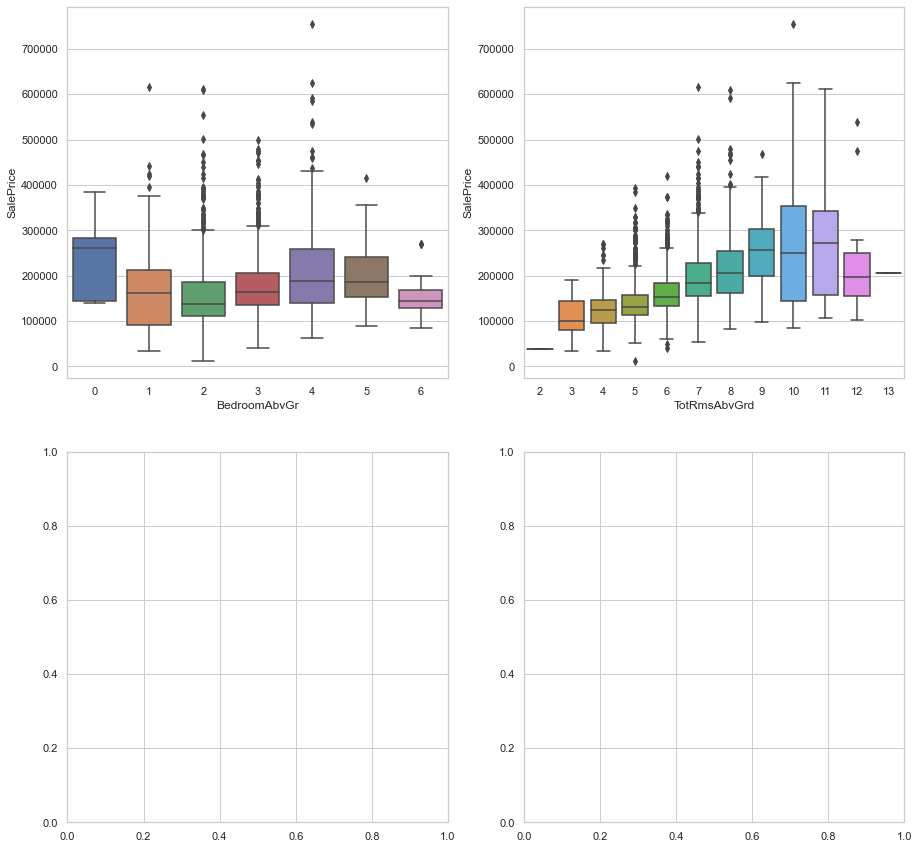

In [100]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

for idx, COL in enumerate(rooms.columns):
    sns.boxplot(ax=ax[idx//2,idx%2],
            x=rooms[COL], y=housing["SalePrice"])

# Kitchen/Bathrooms

In [102]:
for name in kitchen_bath_names:
    print(kitchen_bath[name].value_counts())

0.0    1485
1.0    1065
2.0      27
3.0       1
Name: BsmtFullBath, dtype: int64
0.0    2420
1.0     156
2.0       2
Name: BsmtHalfBath, dtype: int64
2    1327
1    1196
3      45
0       8
4       4
Name: FullBath, dtype: int64
0    1622
1     940
2      18
Name: HalfBath, dtype: int64
1    2473
2     104
0       2
3       1
Name: KitchenAbvGr, dtype: int64
TA    1358
Gd    1017
Ex     142
Fa      62
Po       1
Name: KitchenQual, dtype: int64


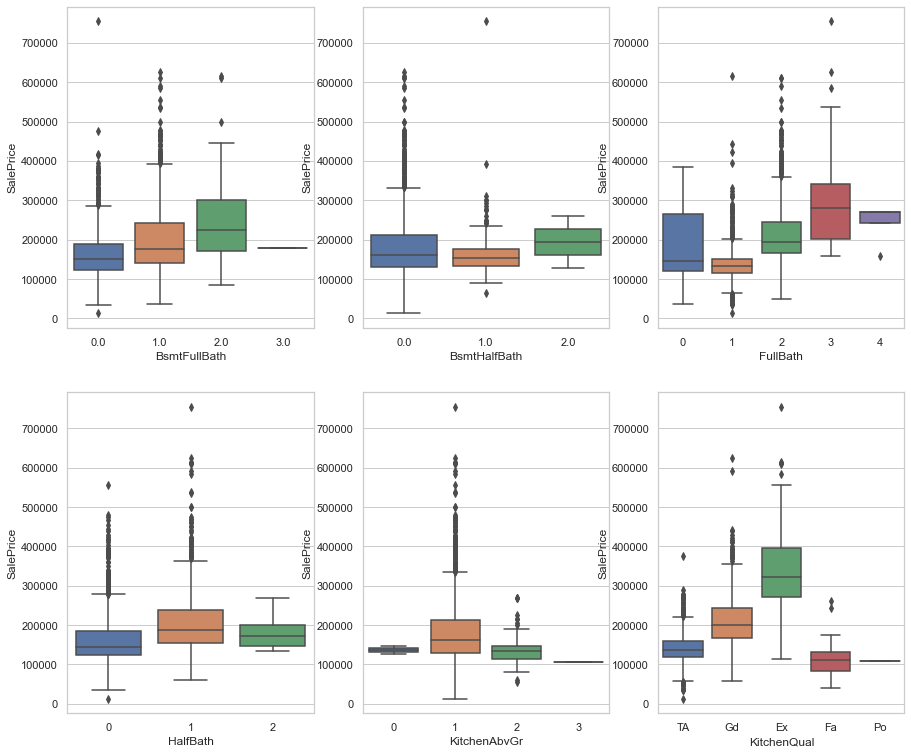

In [111]:
fig, ax = plt.subplots(2,3, figsize=(15,13))

for idx, COL in enumerate(kitchen_bath.columns):
    sns.boxplot(ax=ax[idx//3,idx%3],
            x=kitchen_bath[COL], y=housing["SalePrice"])

# Exterior/Roof

In [112]:
for name in exterior_roof_names:
    print(exterior_roof[name].value_counts())

Gable      2059
Hip         473
Gambrel      18
Flat         16
Mansard      10
Shed          4
Name: RoofStyle, dtype: int64
CompShg    2544
Tar&Grv      18
WdShake       8
WdShngl       7
Membran       1
Roll          1
Metal         1
Name: RoofMatl, dtype: int64
VinylSd    868
HdBoard    416
MetalSd    407
Wd Sdng    385
Plywood    194
CemntBd     97
BrkFace     80
WdShing     51
Stucco      37
AsbShng     34
BrkComm      5
CBlock       2
AsphShn      2
PreCast      1
ImStucc      1
Name: Exterior1st, dtype: int64
VinylSd    856
MetalSd    404
HdBoard    380
Wd Sdng    369
Plywood    238
CmentBd     97
Wd Shng     76
BrkFace     46
Stucco      37
AsbShng     31
Brk Cmn     21
ImStucc     13
AsphShn      4
Stone        4
CBlock       3
PreCast      1
Name: Exterior2nd, dtype: int64
TA    1636
Gd     841
Ex      73
Fa      30
Name: ExterQual, dtype: int64
TA    2232
Gd     279
Fa      56
Ex      11
Po       2
Name: ExterCond, dtype: int64
CBlock    1140
PConc     1105
BrkTil     278


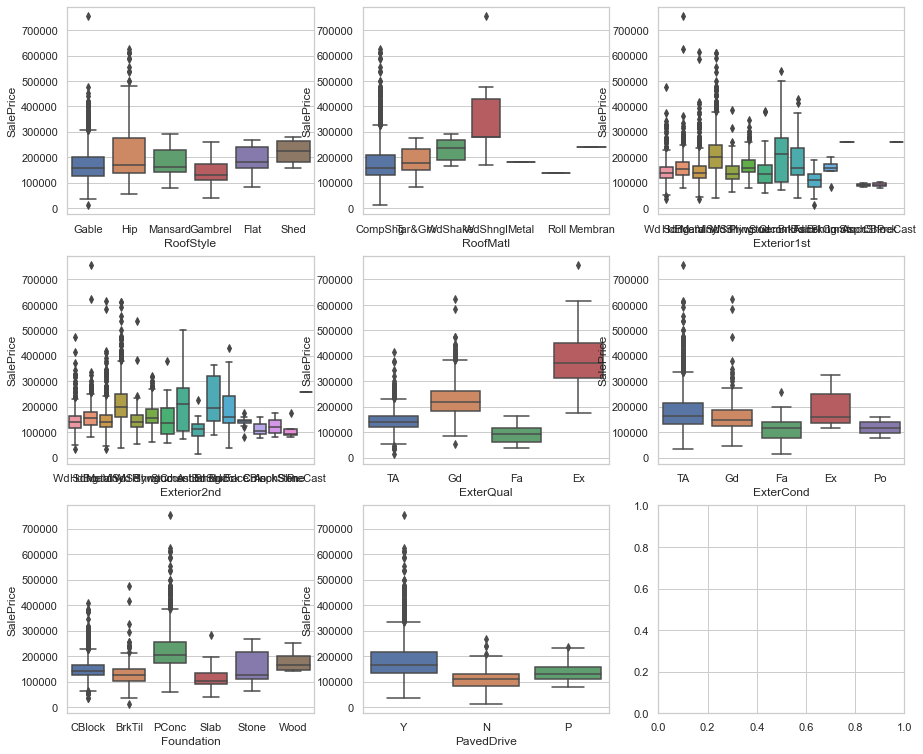

In [113]:
fig, ax = plt.subplots(3,3, figsize=(15,13))

for idx, COL in enumerate(exterior_roof.columns):
    sns.boxplot(ax=ax[idx//3,idx%3],
            x=exterior_roof[COL], y=housing["SalePrice"])